In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sande\OneDrive\Documents\Priya\Data_science_Dataset\House_Price_Prediction_advanced_Regression\boston.csv")

In [2]:
df.shape

(506, 14)

In [3]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [61]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


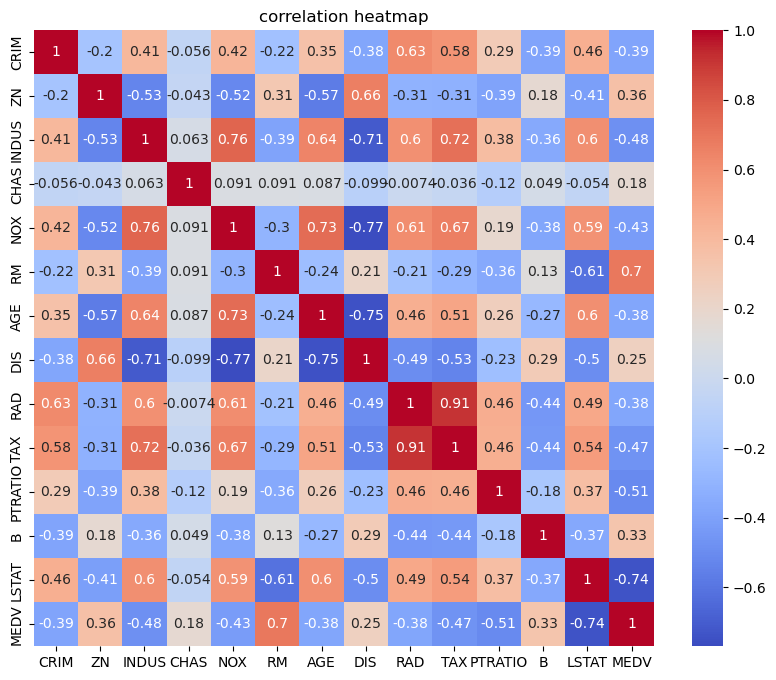

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()


In [11]:
corr_matrix = df.corr(method='pearson')
corr_with_target= corr_matrix['MEDV'].sort_values()
print(corr_with_target)


LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64


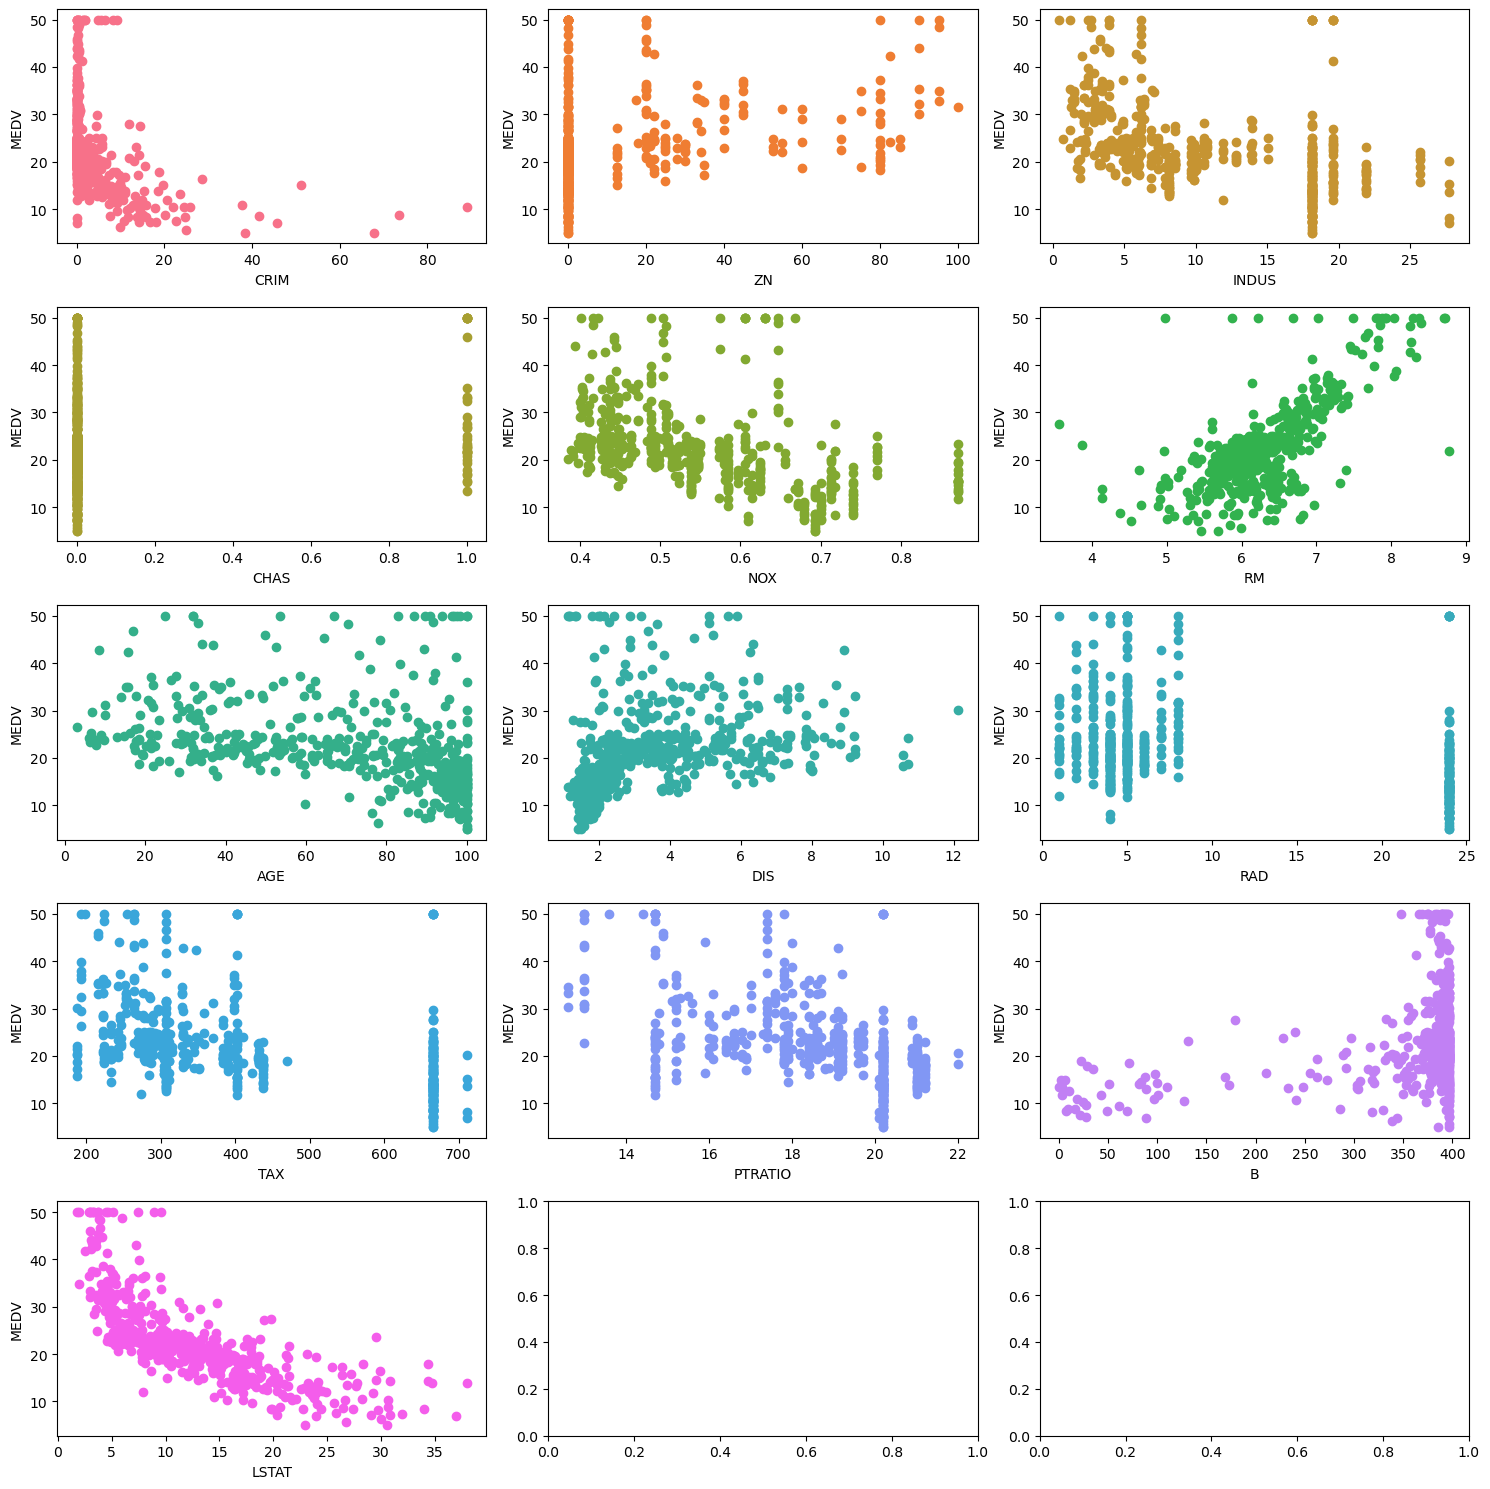

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(5,3,figsize=(15,15)) #5*3=15 plots
axes = axes.flatten() #convert 2D to 1D , 15 axes objects

features = df.columns[:-1] #all columns except  MEDV
colors =sns.color_palette("husl",n_colors=14)

for i,feature in enumerate(features):
    axes[i].scatter(df[feature],df["MEDV"],color=colors[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("MEDV")

plt.tight_layout()
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
import numpy as np




In [5]:
X=df.drop("MEDV",axis=1)
Y=df["MEDV"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


model=XGBRegressor(n_estimators=650,learning_rate=0.009,max_depth=3,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.0,reg_lambda=0.5,gamma=0.0,random_state=42)
model.fit(X_train,Y_train)

#Evaluation 

#Average House price of test data
Average_House_Price= Y_test.mean()
print("Average House price=",Average_House_Price) 

Y_train_pred=model.predict(X_train)
Train_r2=r2_score(Y_train, Y_train_pred)
print("Train R2:",Train_r2)

Y_test_pred = model.predict(X_test)
Test_r2 = r2_score(Y_test,Y_test_pred)
print("Test r2=",Test_r2)

mae=mean_absolute_error(Y_test,Y_test_pred)
print("mae:",mae)
print("MAE based relative error", mae/Average_House_Price)

mse = mean_squared_error(Y_test,Y_test_pred)
print("mse=",mse)

rmse=np.sqrt(mse)
print("rmse=:",rmse)
print("RMSE based relative error", rmse/Average_House_Price)




Average House price= 21.488235294117644
Train R2: 0.9567795327169974
Test r2= 0.9071017457500767
mae: 1.9355741463455498
MAE based relative error 0.09007599367061142
mse= 6.812580433136421
rmse=: 2.6100920353766113
RMSE based relative error 0.12146609526800548




#Identifying and adding linear and Nonlinear features
'''linear_features =['RM']
nonlinear_features =[col for col in X.columns if col not in linear_features]


#Create polnomial degree=2 
preprocessor=ColumnTransformer([('poly',PolynomialFeatures(degree=2,include_bias=False),nonlinear_features),('linear','passthrough',linear_features)])
model=Pipeline([('preprocess',preprocessor),('reg',LinearRegression())])'''


'''Feature Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)'''

'''model=LinearRegression()
model.fit(X_train,Y_train)'''

'''model= Ridge(alpha=0.00002)
model.fit(X_train,Y_train)

model= Lasso(alpha=0.001)
model.fit(X_train,Y_train)'''

'''model= make_pipeline(StandardScaler(),ElasticNet(alpha=0.0001,l1_ratio=0.5,max_iter=1000))
model.fit(X_train,Y_train)'''

In [6]:
X=df.drop("MEDV",axis=1)
Y=df["MEDV"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model=RandomForestRegressor(n_estimators=700,max_depth=4,min_samples_split=4,min_samples_leaf=4,random_state=42)
model.fit(X_train,Y_train)

#Evaluation 

#Average House price of test data
Average_House_Price= Y_test.mean()
print("Average House price=",Average_House_Price) 

Y_train_pred=model.predict(X_train)
Train_r2=r2_score(Y_train, Y_train_pred)
print("Train R2:",Train_r2)

Y_test_pred = model.predict(X_test)
Test_r2 = r2_score(Y_test,Y_test_pred)
print("Test r2=",Test_r2)

mae=mean_absolute_error(Y_test,Y_test_pred)
print("mae:",mae)
print("MAE based relative error", mae/Average_House_Price)

mse = mean_squared_error(Y_test,Y_test_pred)
print("mse=",mse)

rmse=np.sqrt(mse)
print("rmse=:",rmse)
print("RMSE based relative error", rmse/Average_House_Price)



Average House price= 21.488235294117644
Train R2: 0.8865010545207334
Test r2= 0.8154181267777254
mae: 2.382819697152269
MAE based relative error 0.11088950137308672
mse= 13.536087066208502
rmse=: 3.679142164446558
RMSE based relative error 0.1712165803328538


# 